<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Subsetting" data-toc-modified-id="Subsetting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Subsetting</a></span></li></ul></div>

In [1]:
##############################

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import pickle
import matplotlib.colors as colors
import datetime as dt
rb = plt.cm.RdBu
bm = plt.cm.Blues

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
cwd = os.getcwd() + '/'

In [91]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/era_5_lf/'

In [92]:
era = xr.open_dataset(path + 'tcw_2011.nc')

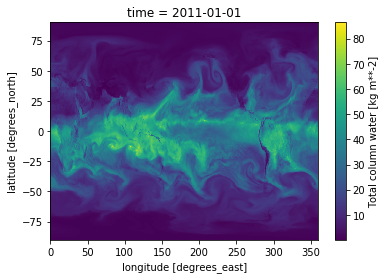

In [5]:
era.isel(time = 0).tcw.plot()

In [6]:
era

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 744)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0 ...
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0 88.75 88.5 ...
  * time       (time) datetime64[ns] 2011-01-01 2011-01-01T01:00:00 ...
Data variables:
    tcw        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-07-23 02:37:20 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

# Subsetting

In [7]:
# %load /home/563/ab2313/MJO/get_awap.py
import sys

def get_platform():
    platforms = {
        'linux1' : 'Linux',
        'linux2' : 'Linux',
        'darwin' : 'OS X',
        'win32' : 'Windows'
    }

    if sys.platform not in platforms:
        return sys.platform

    return platforms[sys.platform]


platform = get_platform()


if platform == 'OS X':
    path =  '/Users/alexborowiak/Desktop/large_files/'


   
    
else:
    path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Scripts/big_files/'
#     path = '/home/563/ab2313/big_files/'


precip = xr.open_dataset(path + 'AWAP_W.nc', chunks={'time':-1, 'lat': 50, 'lon': 50}).precip

In [8]:
precip

<xarray.DataArray 'precip' (time: 7822, lat: 53, lon: 178)>
dask.array<shape=(7822, 53, 178), dtype=float32, chunksize=(7822, 50, 50)>
Coordinates:
  * time     (time) datetime64[ns] 1974-10-01T09:00:00 1974-10-02T09:00:00 ...
  * lon      (lon) float64 112.0 112.2 112.5 112.8 113.0 113.2 113.5 113.8 ...
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 -22.0 -21.75 -21.5 ...
Attributes:
    long_name:  Daily Precipitation
    units:      mm

In [83]:
era

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 744)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0 ...
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0 88.75 88.5 ...
  * time       (time) datetime64[ns] 2011-01-01 2011-01-01T01:00:00 ...
Data variables:
    tcw        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-07-23 02:37:20 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [84]:
era.time.values

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', '2011-01-01T03:00:00.000000000',
       '2011-01-01T04:00:00.000000000', '2011-01-01T05:00:00.000000000',
       '2011-01-01T06:00:00.000000000', '2011-01-01T07:00:00.000000000',
       '2011-01-01T08:00:00.000000000', '2011-01-01T09:00:00.000000000',
       '2011-01-01T10:00:00.000000000', '2011-01-01T11:00:00.000000000',
       '2011-01-01T12:00:00.000000000', '2011-01-01T13:00:00.000000000',
       '2011-01-01T14:00:00.000000000', '2011-01-01T15:00:00.000000000',
       '2011-01-01T16:00:00.000000000', '2011-01-01T17:00:00.000000000',
       '2011-01-01T18:00:00.000000000', '2011-01-01T19:00:00.000000000',
       '2011-01-01T20:00:00.000000000', '2011-01-01T21:00:00.000000000',
       '2011-01-01T22:00:00.000000000', '2011-01-01T23:00:00.000000000',
       '2011-01-02T00:00:00.000000000', '2011-01-02T01:00:00.000000000',
       '2011-01-02T02:00:00.000000000', '2011-01-02

In [85]:
era_sub = era.sel(latitude = slice(-10, -23), longitude = slice(112, 156.25))

era_sub = era_sub.sel(time = slice('2011-01-01T09:00:00.000000000','2011-01-31T08:00:00.000000000'))

era_sub['time'] = era_sub.time.values - pd.to_timedelta('9h')

In [112]:
era_sub

<xarray.Dataset>
Dimensions:    (latitude: 53, longitude: 178, time: 720)
Coordinates:
  * longitude  (longitude) float32 112.0 112.25 112.5 112.75 113.0 113.25 ...
  * latitude   (latitude) float32 -10.0 -10.25 -10.5 -10.75 -11.0 -11.25 ...
  * time       (time) datetime64[ns] 2011-01-01 2011-01-01T01:00:00 ...
Data variables:
    tcw        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-07-23 02:37:20 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [107]:
era_mean = era_sub.resample('D', dim = 'time', how = 'mean')

In [108]:
era_mean

<xarray.Dataset>
Dimensions:    (latitude: 53, longitude: 178, time: 30)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-01 2011-01-02 2011-01-03 ...
  * longitude  (longitude) float32 112.0 112.25 112.5 112.75 113.0 113.25 ...
  * latitude   (latitude) float32 -10.0 -10.25 -10.5 -10.75 -11.0 -11.25 ...
Data variables:
    tcw        (time, latitude, longitude) float32 59.477222 59.490498 ...